In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import streamlit as st

In [2]:
start = '2011-01-01'
end = '2021-12-31'

In [3]:

user_input = st.text_input("Enter Stock Ticker", 'AAPL')
df = data.DataReader(user_input, 'yahoo', start, end)
df.head()

2021-07-26 11:51:54.762 
  command:

    streamlit run c:\users\pratik\appdata\local\programs\python\python39\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.906079
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.121364
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.174186
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.257413
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.249121


In [4]:
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.906079
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.121364
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.174186
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.257413
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.249121


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0


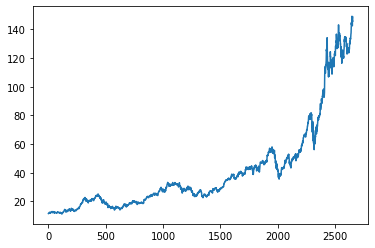

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...
2653,144.070007,141.669998,143.750000,142.449997,121434600.0
2654,147.100006,142.960007,143.460007,146.149994,96350000.0
2655,146.130005,144.630005,145.529999,145.399994,74993500.0
2656,148.199997,145.809998,145.940002,146.800003,77338200.0


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2653    129.3691
2654    129.6207
2655    129.8621
2656    130.0522
2657    130.2866
Name: Close, Length: 2658, dtype: float64

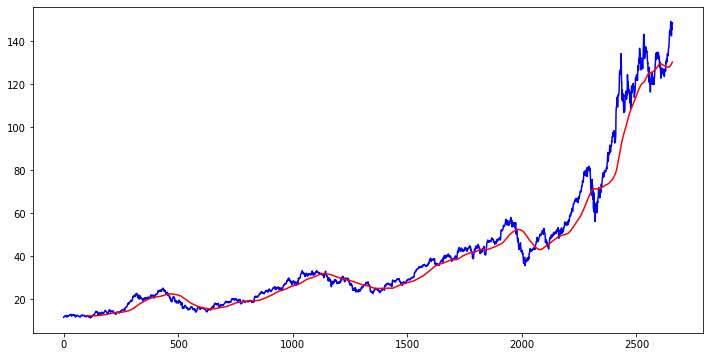

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2653    127.0973
2654    127.2441
2655    127.4060
2656    127.5575
2657    127.7345
Name: Close, Length: 2658, dtype: float64

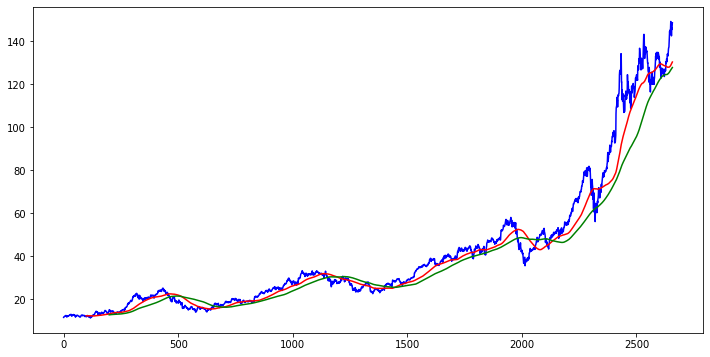

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2658, 5)

In [13]:
#spliting data into traning and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.head()
data_testing.head()

,Close
1860,47.090000
1861,47.037498
1862,47.145000
1863,46.974998
1864,46.875000


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00713329],
       [0.01403996],
       [0.01573462],
       ...,
       [0.97427488],
       [0.98337873],
       [0.98013722]])

In [16]:
x_train = []
y_train = []

In [17]:
for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1760, 100, 1)

In [18]:
#ML model
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units= 50 , activation='relu', return_sequences = True,
                 input_shape =(x_train.shape[1],1) ))
model.add(Dropout(0.2))


model.add(LSTM(units= 60 , activation='relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units= 80 , activation='relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units= 120 , activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [21]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
55/55 [==============================] - 72s 303ms/step - loss: 0.0932
Epoch 2/50
55/55 [==============================] - 16s 291ms/step - loss: 0.0093
Epoch 3/50
55/55 [==============================] - 16s 299ms/step - loss: 0.0070
Epoch 4/50
55/55 [==============================] - 16s 291ms/step - loss: 0.0061
Epoch 5/50
55/55 [==============================] - 16s 291ms/step - loss: 0.0064
Epoch 6/50
55/55 [==============================] - 16s 291ms/step - loss: 0.0053
Epoch 7/50
55/55 [==============================] - 16s 293ms/step - loss: 0.0061
Epoch 8/50
55/55 [==============================] - 16s 290ms/step - loss: 0.0053
Epoch 9/50
55/55 [==============================] - 17s 305ms/step - loss: 0.0052
Epoch 10/50
55/55 [==============================] - 16s 298ms/step - loss: 0.0046
Epoch 11/50
55/55 [==============================] - 16s 293ms/step - loss: 0.0046
Epoch 12/50
55/55 [==============================] - 16s 289ms/step - loss: 0.0045
Epoch 13/50
5

In [22]:
model.save('keras_model.h5')

In [23]:
data_testing.head()

,Close
1860,47.090000
1861,47.037498
1862,47.145000
1863,46.974998
1864,46.875000


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = past_100_days.append(data_training , ignore_index = True)

In [28]:
final_df.head()

,Close
0,42.770000
1,42.307499
2,43.064999
3,43.057499
4,43.257500


In [29]:
input_data = scaler.fit_transform(final_df)

In [30]:
input_data

array([[0.86923628],
       [0.85647711],
       [0.87737448],
       ...,
       [0.97427488],
       [0.98337873],
       [0.98013722]])

In [31]:
input_data.shape

(1960, 1)

In [53]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i -100 : i])
    y_test.append(input_data[i, 0])

In [54]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1860, 100, 1)
(1860,)


In [55]:
# making preadiction

y_predicted = model.predict(x_test)

In [56]:
y_predicted.shape

(1860, 1)

In [43]:
y_predicted

array([[31.895216],
       [30.870398],
       [28.832172],
       ...,
       [32.166767],
       [32.077904],
       [31.977364]], dtype=float32)

In [52]:
y_test

array([  339.75229503,   668.71048878,   749.42565549, ...,
       46403.83891477, 46837.44751189, 46683.05702768])

In [44]:
scaler.scale_

array([0.0275873])

In [49]:
scale_factor = 1/0.0275873
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

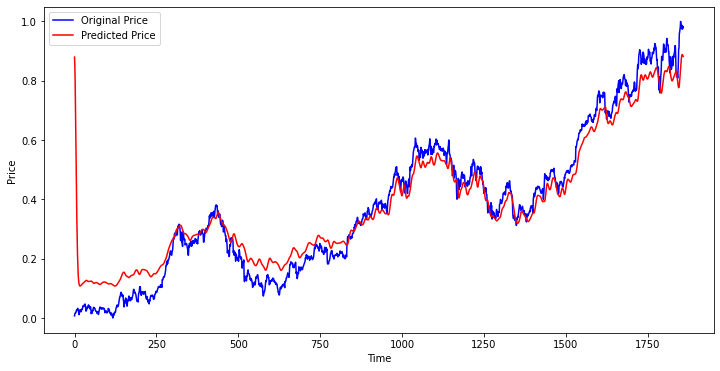

In [63]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted , 'r', label = 'Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()